In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
actions = pd.read_csv("../../data/user16_vs_the_world.csv")
actions.head()

,traveled_distance_pixel,elapsed_time,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,min_curv,mean_omega,...,action_3,action_4,direction_1,direction_2,direction_3,direction_4,direction_5,direction_6,direction_7,user_16
0,7.000000,0.125,1.000000,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
1,89.008474,0.437,0.999968,5,0.016948,-0.000634,0.001366,0.000287,-0.002825,0.009086,...,0,0,0,0,0,0,0,0,0,1
2,3.000000,0.125,1.000000,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
3,1051.510748,3.369,0.310032,29,12.039747,0.060570,0.315803,1.570796,-0.397340,0.563722,...,1,0,0,0,0,0,0,0,0,1
4,42.000000,0.390,1.000000,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [5]:
actions.columns

Index(['traveled_distance_pixel', 'elapsed_time', 'straightness', 'num_points',
       'sum_of_angles', 'mean_curv', 'sd_curv', 'max_curv', 'min_curv',
       'mean_omega', 'sd_omega', 'max_omega', 'min_omega', 'largest_deviation',
       'dist_end_to_end_line', 'num_critical_points', 'mean_vx', 'sd_vx',
       'max_vx', 'min_vx', 'mean_vy', 'sd_vy', 'max_vy', 'min_vy', 'mean_v',
       'sd_v', 'max_v', 'min_v', 'mean_a', 'sd_a', 'max_a', 'min_a',
       'mean_jerk', 'sd_jerk', 'max_jerk', 'min_jerk', 'a_beg_time',
       'action_3', 'action_4', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7', 'user_16'],
      dtype='object')

In [6]:
# split into features and target variable
X = actions.drop("user_16", axis=1)
y = actions["user_16"]

norm_X = normalize(X)

scaler = StandardScaler()
std_X = scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.3,
                                                    random_state=42)

C:\Users\Jake King\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jake King\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [32]:
# knn algo testing 1 to 50 neighbors to see which number of neighbors is best

scores = []

for i in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

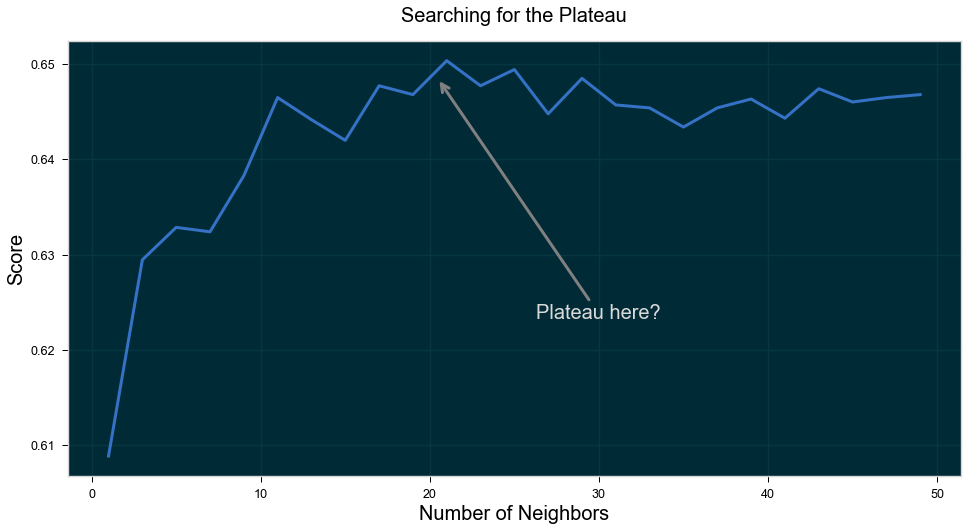

In [35]:
# plot scores for different numbers of neighbors

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=list(range(1, 50, 2)), y=scores, ax=ax, lw=3)
ax.set_title("Searching for the Plateau", color="black", size=20, y=1.03)
ax.set_xlabel("Number of Neighbors", color="black", size=20)
ax.set_ylabel("Score", color="black", size=20)
ax.tick_params(colors="black")

ax.annotate("Plateau here?",
            xy=(0.45, 0.85),
            xytext=(0.55, 0.4),
            xycoords="figure fraction",
            textcoords="figure fraction",
            size=20,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='grey',
                            lw=3))

plt.show()

# K-Nearest Neighbors with GridSearchCV (std_X)

In [36]:
param_grid = {"n_neighbors": np.arange(1, 50, 2),
             "weights": ["uniform", "distance"]}

In [39]:
knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid,
                        verbose=1,
                        cv=3,
                        n_jobs=-1)

In [41]:
knn_gscv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 20.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [45]:
knn_gscv.best_params_

{'n_neighbors': 23, 'weights': 'distance'}

In [47]:
knn_gscv.best_score_

0.64884230080276

# K-Nearest Neighbors with GridSearchCV (X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [15]:
param_grid = {"n_neighbors": np.arange(1, 100, 2),
             "weights": ["uniform", "distance"]}

In [16]:
knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid,
                        verbose=1,
                        cv=3,
                        n_jobs=-1)

In [17]:
knn_gscv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Label encoding?
Classification based on each session?
Forward and backward feature selection.
Visualise the training data and timestamps (how are timestamps distributed?).

In [18]:
knn_gscv.best_score_

0.6204471571684469

In [19]:
knn_gscv.best_params_

{'n_neighbors': 87, 'weights': 'distance'}